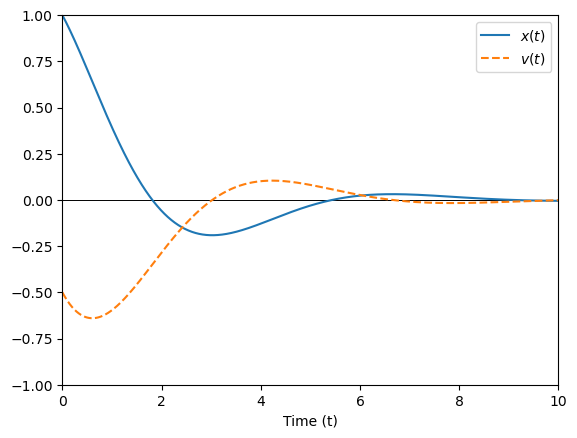

In [33]:
'''
Kimaru Boruett
ENGR 091 S25 - Nonlinear Dynamics and Chaos
HW-1
'''
import matplotlib.pyplot as plt
import numpy as np


#problem 3: Plot of Analytical Solution

x_0 = 1
v_0 = -0.5
m = 1
c = 1
k = 1
alpha = (-c/(2*m))
w_d = np.sqrt(abs(c**2-4*m*k))/(2*m)
A = x_0
B = (v_0-alpha*A)/w_d

def position(A,B,alpha,w_d):
    t = np.linspace(0,10,2000)
    pos = np.linspace(0,10,2000)
    
    for i in range(len(pos)):
        pos[i] = np.exp(alpha*t[i])*(A*np.cos(w_d*t[i])+B*np.sin(w_d)*t[i])
        
    return t, pos



def velocity(A,B,alpha,w_d):
    t = np.linspace(0,10,2000)
    vel = np.linspace(0,10,2000)
    for i in range(len(vel)):
        vel[i] = alpha*(np.exp(alpha*t[i])*(A*np.cos(w_d*t[i])+B*np.sin(w_d)*t[i]))+ \
        np.exp(alpha*t[i])*w_d*(-A*np.sin(w_d*t[i])+B*np.cos(w_d*t[i]))
        
        
    return t, vel   
    
    
    
pos = position(A,B,alpha,w_d) 
vel = velocity(A,B,alpha,w_d)
ax =plt.gca()
ax.axhline(0,color='black', linewidth=0.7)
ax.axvline(0,color='black', linewidth=0.7)
ax.margins(0)
ax.set_xlim([0,10])
ax.set_ylim([-1,1])

plt.plot(pos[0],pos[1], label = '$x(t)$')
plt.plot(vel[0],vel[1], label = '$v(t)$', linestyle='--')
plt.xlabel('Time (t)')
plt.legend()
plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\d'
<>:48: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_6657/1673307733.py:48: SyntaxWarning: invalid escape sequence '\d'
  plt.plot([],[],'k--',label='Velocity $\dot{x}(t)$')


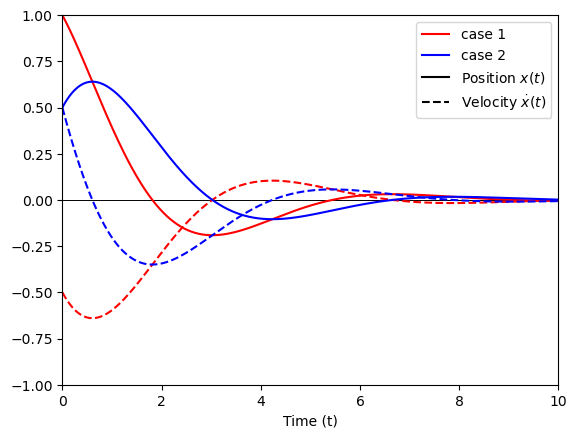

In [34]:
#Problem 4: Numerical Solution of ODE

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import array, exp, sin, pi, linspace

k=1
m=1
c=1

#case [position, velocity]
case_1 = [1,-0.5]
case_2 = [0.5,0.5]
def func(t, states,m,k,c):
    x, y = states
    dxdt = y
    dydt = (-k/m)*x-(c/m)*y
    
    return [dxdt, dydt]

time = linspace(0,10,2000)

sol_1 = solve_ivp(func, 
                [0,10], 
                case_1, 
                t_eval = time,
                args=(m,k,c))

sol_2 = solve_ivp(func, 
                [0,10], 
                case_2, 
                t_eval = time,
                args=(m,k,c))


ax =plt.gca()
ax.axhline(0,color='black', linewidth=0.7)
ax.axvline(0,color='black', linewidth=0.7)
ax.margins(0)
ax.set_xlim([0,10])
ax.set_ylim([-1,1])
plt.plot(sol_1.t,sol_1.y[0], color='red', label='case 1')
plt.plot(sol_1.t,sol_1.y[1], linestyle='--',color='red')

plt.plot(sol_2.t,sol_2.y[0], color='blue', label='case 2')
plt.plot(sol_2.t,sol_2.y[1], linestyle='--', color='blue')
plt.xlabel('Time (t)')
plt.plot([],[],'k-', label='Position $x(t)$')
plt.plot([],[],'k--',label='Velocity $\dot{x}(t)$')
plt.legend()
plt.show()